In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

# Read CSV
data = pd.read_csv('breakhis_data/Folds.csv')

# Dataset directory
root_dir = 'breakhis_data/BreaKHis_v1/'

# Classes
class_names = ['benign', 'malignant']

# Number of workers for parallel data loading
NUM_WORKERS = os.cpu_count()  


In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from PIL import Image

class BreakHisDataset(Dataset):
    def __init__(self, data, root_dir, group=None, mag=None, transform=None):
        if isinstance(data, str):
            self.data = pd.read_csv(data)
        else:
            self.data = data.copy()

        if group is not None:
            self.data = self.data[self.data['grp'] == group]

        if mag is not None:
            self.data = self.data[self.data['mag'] == mag]

        self.data = self.data.reset_index(drop=True)
        self.root_dir = root_dir
        self.transform = transform
        
        # Extract benign/malignant
        self.data['label'] = self.data['filename'].apply(lambda x: x.split('/')[3])
        self.class_names = sorted(self.data['label'].unique())
        self.data['label_int'] = self.data['label'].apply(lambda x: self.class_names.index(x))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.root_dir, row['filename'])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = row['label_int']
        return image, label

    def class_distribution(self, plot=False):
        counts = self.data['label'].value_counts()
        if plot:
            sns.barplot(x=counts.index, y=counts.values)
            plt.title("Class Distribution")
            plt.ylabel("Count")
            plt.xlabel("Class")
            plt.show()
        return counts


   fold  mag    grp                                           filename   label
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...  benign
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...  benign
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...  benign
3     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...  benign
4     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...  benign


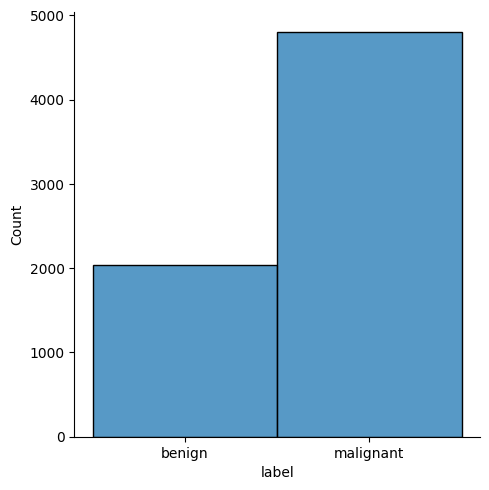

Count of Benign    : 2038
Count of Malignant : 4799


In [12]:
#Stats
import seaborn as sns
import matplotlib.pyplot as plt

print(data.head())  # First 5 rows

# Plot distribution of labels
sns.displot(data=data, x='label')
plt.show()

# Count values
print('Count of Benign    :', (data['label'] == 'benign').sum())
print('Count of Malignant :', (data['label'] == 'malignant').sum())


label
malignant    4799
benign       2038
Name: count, dtype: int64


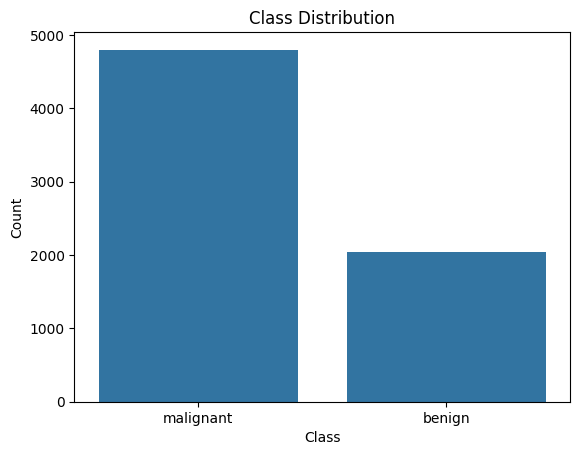

Series([], Name: count, dtype: int64)


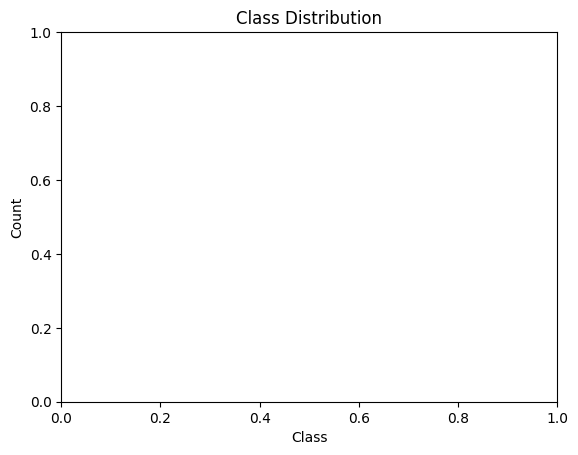

label
malignant    2386
benign       1182
Name: count, dtype: int64


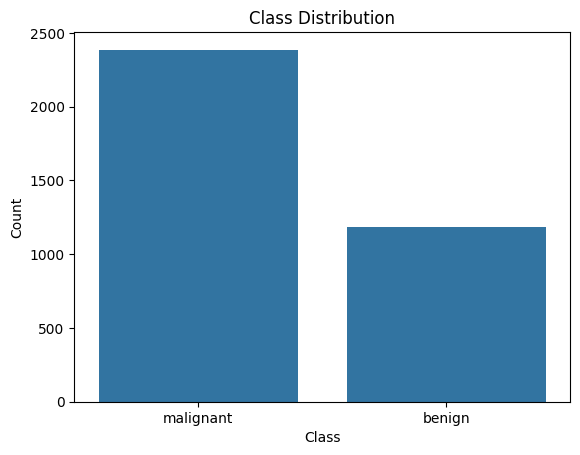

label
malignant    2386
benign       1182
Name: count, dtype: int64

In [ ]:
mean = (0.4914, 0.4822, 0.4465)
std = (0.2023, 0.1994, 0.2010)

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# --------------------
# Create datasets
# --------------------
train_dataset = BreakHisDataset("train_split.csv", root_dir, group="train", mag=magnification, transform=train_transform)
val_dataset = BreakHisDataset("val_split.csv", root_dir, group="train", mag=magnification, transform=val_test_transform)
test_dataset = BreakHisDataset("test_split.csv", root_dir, group="test", mag=magnification, transform=val_test_transform)


print(train_dataset.class_distribution())
train_dataset.class_distribution(plot=True)

print(val_dataset.class_distribution())
val_dataset.class_distribution(plot=True)

print(test_dataset.class_distribution())
test_dataset.class_distribution(plot=True)
